<h2>Regression Analysis Assignment | Machine Learning</h2>

In [1]:
###########################################################
# importing the necessary libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # predictive modeling package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
###########################################################

###########################################################
#Data extraction and cleaning
###########################################################
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# defining the data set correctly
file = './birthweight_low.xlsx'

#reading the data from excel
birth_weight = pd.read_excel(io         = file,
                             header     = 0,
                             sheet_name = 0)

# verifying the first 10 rows of the dataset
birth_weight.head(n=10)

# checking the information of each variable
birth_weight.info(verbose = True) # there are null values in the dataset

#######################################################################
# Dealing with the null values using central tendencies
#######################################################################
meduc_median = birth_weight['meduc'].median() #median of meduc in years
feduc_median = birth_weight['feduc'].median() #median of feduc in years
npvis_median = birth_weight['npvis'].median() #median of npvis

#filling in the missing values with the corresponding medians
birth_weight['meduc'].fillna(value = meduc_median,
                          inplace  = True)

birth_weight['npvis'].fillna(value = npvis_median,
                           inplace = True)

birth_weight['feduc'].fillna(value = feduc_median,
                           inplace = True)
#######################################################################

#verifying that the changes have been made on the dataset
birth_weight.info(verbose=True) # there are no more null values 

#studying the ranges of the variables to classify them as continuous or not
birth_weight.describe(include = 'number').round(decimals=2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,38.93,13.54,2.02,13.52,40.60,13.59,7.95,8.88,10.76,5.53,0.55,0.33,0.36,0.30,0.40,0.33,0.27,3246.09
std,10.36,2.28,0.34,6.30,12.21,2.94,2.02,0.79,6.95,3.87,0.50,0.47,0.48,0.46,0.49,0.47,0.45,757.70
min,21.00,0.00,1.00,2.00,19.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,32.00,12.00,2.00,10.00,31.75,12.00,8.00,9.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2867.75
50%,37.00,13.00,2.00,12.00,39.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3349.00
75%,45.00,16.00,2.00,16.00,47.25,16.00,9.00,9.00,16.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3778.75
max,73.00,18.00,7.00,42.00,72.00,19.00,10.00,10.00,32.00,21.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


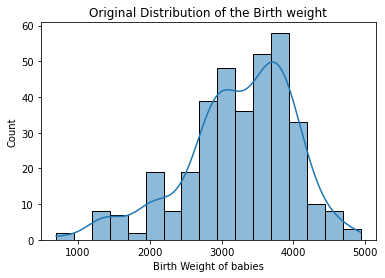

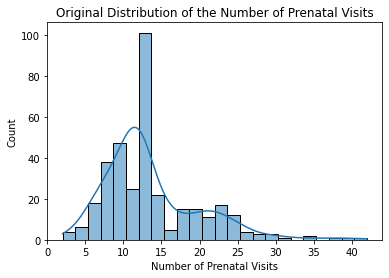

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_npvis,par_age,par_habits
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600,3.556303,1.041393,1058,52
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912,3.592399,1.000000,1150,1
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090,3.489958,1.079181,624,84
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370,3.527630,1.079181,825,84
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827,3.582858,0.903090,800,12


In [2]:
######################################################################
#Prepping the dataset for modelling by subsetting the variables needed
######################################################################
# creating a list of continuous features (including bwght)
continuous_data = ["bwght","mage","meduc","fage","feduc","npvis","cigs",
                   "drink"]

# developing a correlation matrix based on the continuous features
birth_corr = birth_weight[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with bwght
birth_corr.loc[ : ,"bwght"].round(decimals = 2).sort_values(ascending = False)

#analysing the distribution of some variables using histograms
#1. bwght
sns.histplot(data  = birth_weight,
             x     = "bwght",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of the Birth weight")
plt.xlabel(xlabel = "Birth Weight of babies") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

#2. npvis
sns.histplot(data  = birth_weight,
             x     = "npvis",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of the Number of Prenatal Visits")
plt.xlabel(xlabel = "Number of Prenatal Visits") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

#log transformation of bwght and npvis
birth_weight['log_bwght'] = np.log10(birth_weight['bwght']) # new column
birth_weight['log_npvis'] = np.log10(birth_weight['npvis']) #new column

#product of some variables to tell a story based on age and habits of parents
birth_weight['par_age'] = birth_weight['mage'] * birth_weight['fage']
birth_weight['par_habits'] = birth_weight['drink'] * birth_weight['cigs']

#verifying that the 4 columns have been created
birth_weight.head(n=5)

In [8]:
#confirming there are no null values before modelling
birth_weight.isnull().any(axis=0).any(axis=0)

False

In [3]:
#######################################################################
#Model Development Preparation - train and test data prep
#######################################################################
#preparing explanatory variable data
birth_weight_data   = birth_weight.drop(['bwght','log_bwght',
                                         'npvis','fmaps','omaps'],
                               axis = 1) 
#comprises categorical variables and test that occur after the event


# preparing response variables
birth_weight_target = birth_weight.loc[ : , 'log_bwght']

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_weight_data,            #x data
            birth_weight_target,          #y data
            test_size = 0.25,        #size of training set
            random_state = 219)      # randomness


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 17)
y-side: (264,)


Testing Data
------------
X-side: (88, 17)
y-side: (88,)



In [4]:
###########################################################################
#Model Development in statsmodels
###########################################################################
# declaring set of x-variables (Based on fav variables)
x_variables = ['log_npvis','mage','fage','drink','par_age',
               'par_habits']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_npvis +
mage +
fage +
drink +
par_age +
par_habits +


In [5]:
# merging X_train and y_train so that they can be used in statsmodels
birth_weight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_bwght ~ log_npvis +
                                                    mage +
                                                    fage +
                                                    drink +
                                                    par_age +
                                                    par_habits""",
                                                data = birth_weight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           6.54e-85
Time:                        21:39:16   Log-Likelihood:                 385.63
No. Observations:                 264   AIC:                            -757.3
Df Residuals:                     257   BIC:                            -732.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0557      0.058     52.397      0.0

In [6]:
###########################################################################
#Model Development in scikit-learn
###########################################################################
# preparing x-variables from the OLS model
ols_data = birth_weight.loc[:,x_variables ]


# preparing response variable
birth_weight_target = birth_weight.loc[:,'log_bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_weight_data,     # x-variables
            birth_weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birth_weight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [7]:
#############################################################################
#Developing an OLS regression model in scikit-learn
#############################################################################
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results using R-square for training and testing
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) 

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7931
OLS Testing Score  : 0.7495
OLS Train-Test Gap : 0.0436


In [8]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth_weight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3.06)
('log_npvis', 0.08)
('mage', 0.01)
('fage', 0.01)
('drink', 0.01)
('par_age', -0.0)
('par_habits', -0.0)


In [9]:
############################################################################
#Developing a Lasso regression model in scikit-learn.
############################################################################
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL)
      .round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL)
      .round(4))

# saving scoring data for future use using R-square
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) 
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', lasso_train_score - lasso_test_score.round(4))
lasso_test_gap = lasso_train_score - lasso_test_score.round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0002
Lasso Train-Test Gap : 0.0002


In [10]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_weight_data.columns, 
                         lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3.5)
('mage', -0.0)
('meduc', 0.0)
('monpre', 0.0)
('fage', -0.0)
('feduc', 0.0)
('cigs', -0.0)
('drink', -0.0)
('male', -0.0)
('mwhte', -0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', -0.0)
('fblck', 0.0)
('foth', 0.0)
('log_npvis', 0.0)
('par_age', -0.0)
('par_habits', -0.0)


In [11]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3.5)
('meduc', 0.0)
('fage', -0.0)
('cigs', -0.0)
('male', -0.0)
('mblck', 0.0)
('fwhte', -0.0)
('foth', 0.0)
('par_age', -0.0)


In [12]:
############################################################################
#Developing an ARD regression model in scikit-learn.
############################################################################
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = True)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.798
Testing Score : 0.757
ARD Train-Test Gap : 0.041


In [13]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_weight_data.columns, 
                       ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.08)
('mage', 0.01136)
('meduc', 0.0)
('monpre', 0.0)
('fage', 0.0099)
('feduc', 0.0006)
('cigs', 0.00074)
('drink', 0.00604)
('male', 0.01049)
('mwhte', 0.0)
('mblck', 0.0)
('moth', 0.00027)
('fwhte', 0.0)
('fblck', 0.0)
('foth', 0.0)
('log_npvis', 0.07165)
('par_age', -0.00028)
('par_habits', -0.00127)


In [14]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.08)
('mage', 0.01136)
('monpre', 0.0)
('fage', 0.0099)
('feduc', 0.0006)
('cigs', 0.00074)
('drink', 0.00604)
('male', 0.01049)
('mblck', 0.0)
('moth', 0.00027)
('fblck', 0.0)
('log_npvis', 0.07165)
('par_age', -0.00028)
('par_habits', -0.00127)


In [15]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}




Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7931           0.7495
Lasso      0.0           -0.0002
ARD        0.798           0.757



In [18]:
###########################################################################
#Final Model Output in dynamic print
###########################################################################
print(f"""
Model      Train Score      Test Score        Train-Test Gap
-----      -----------      ----------        --------------
ARD          {ard_train_score}              {ard_test_score}               {ard_test_gap}
""")


Model      Train Score      Test Score        Train-Test Gap
-----      -----------      ----------        --------------
ARD          0.798              0.757               0.041

